#                                            Master Thesis

## Agricultural Production Optimization System using Machine Learning

###### Motivation: The motivation for a crop yield prediction project using machine learning algorithms is to improve the efficiency and productivity of agriculture, while also reducing costs and promoting sustainability. Accurate crop yield predictions can help farmers plan better, optimize resource use, and make better decisions about crop management practices. This can lead to higher profits for farmers, reduced waste, and a smaller environmental footprint. Ultimately, the goal of such a project is to improve outcomes for farmers, consumers, and the environment.

###### Aim: The goal of this research is to establish an agricultural business production optimization system using machine learning techniques to predict crop yields and optimize resource utilization. The objective of this project is scalable, accurate, and inexpensive method to predict crop yield with high spatial resolution using available climatic data and Machine Learning. 

###### Objectives: 1] To acquire and process pertinent agricultural information from multiple sources., including weather data, soil data, and crop yield data. 2] To develop a machine learning model using decision tree regressor and XGBoost regressor algorithms to predict crop yields depending on soil and climate circumstances. 3] To optimize the use of resources such as water, fertilizer, and pesticides by recommending the optimal amount and timing of application. 4] To test and validate the developed model using historical data and compare its performance with traditional methods of Produce from agriculture. 5] To evaluate the economic and environmental benefits of the proposed system by analyzing its impact on crop yields, resource utilization, and carbon footprint. 6] To design a user interface that is simple to use for the proposed system that can be used by farmers, agronomists, and other stakeholders involved in agricultural production. 7] To provide recommendations and guidelines for the implementation and adoption of the proposed system in different regions and farming practices. 8] To conduct a thorough literature review on artificial intelligence uses for agricultural output maximization.

###### The objectives of this study aim to contribute to sustainable agriculture by optimizing agricultural production processes, minimizing the environmental impact of farming procedures and guaranteeing food security.

### 1. Data Cleaning

###### The objective of data cleaning is to fix any data that is incorrect, inaccurate, incomplete, incorrectly formatted, duplicated, or even irrelevant to the objective of the data set.

### 1.1 Import Libraries

###### In this project following libraries are used like pandas, copy, matplotlib, numpy, warnings etc. 1] Pandas: pandas is a powerful library that enables users to perform a wide range of data manipulation and analysis tasks efficiently and effectively. 2] Copy: copy library can be a useful tool when working with complex objects in Python, especially when you need to make copies of those objects without modifying the original objects. 3] Matplotlib: Matplotlib is a versatile and powerful library that is essential for data scientists and researchers who need to create informative and visually appealing plots in Python. 4] Numpy: NumPy is a fundamental library for scientific computing in Python, and its efficient handling of arrays and matrices makes it a go-to choice for numerical computing and data analysis in the scientific and engineering communities. 5] Warnings: warnings library is a useful tool for identifying and handling potential issues in code. By using the warnings library, programmers can ensure that their code is reliable, maintainable, and compatible with different versions of Python and third-party libraries.

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1.2 Import Data

###### The pd.read_csv() function is a method provided by the Pandas library in Python for reading data from a CSV (Comma Separated Values) file and creating a DataFrame object. This dataset information taken from USDA National Agricultural Statistics Service (NASS) data, National Weather Service (NOAA), Natural Resources Conservation Service (NRCS) etc. In this Dataset following information are there like State Name, District Name, Crop Year, Season, Crop, Area, Production. By using this information we can create ML Model for Crop Yield Prediction.

In [2]:
df = pd.read_csv(r'D:\Shriraj\Master Thesis\New Code\New folder\Crop Yeild-20230318T151143Z-001\Crop Yeild\cropyield.csv')
df.head()

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
0,46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,749.095000
1,51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,11.054167
2,623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,937.600000
3,630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,830.800000
4,698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,3.633333


### 1.3 Check Null Values

###### The value_counts() function is used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [3]:
df.District_Name.value_counts()

AMBALA         96
PANIPAT        90
KAITHAL        85
YAMUNANAGAR    81
KURUKSHETRA    78
               ..
IMPHAL EAST     1
AMROHA          1
KHEDA           1
ALIGARH         1
BEMETARA        1
Name: District_Name, Length: 408, dtype: int64

###### The iloc() function in python is defined in the Pandas module that helps us to select a specific row or column from the data set. Using the iloc method in python, we can easily retrieve any particular value from a row or column by using index values.

In [4]:
data=df.iloc[:,1:8]

###### The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [5]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
0,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,749.095000
1,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,11.054167
2,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,937.600000
3,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,830.800000
4,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,3.633333


###### isnull(). sum(). sum() returns the number of missing values in the dataset. This knowledge can assist in identifying absent data that might need interpolation or elimination prior to computing.

In [6]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
production       0
dtype: int64

### 2. Data Visualization

###### Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.

### 2.1 Check Outliers


###### Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data. For data that follows a normal distribution, the values that fall more than three standard deviations from the mean are typically considered outliers. Outliers can find their way into a dataset naturally through variability, or they can be the result of issues like human error, faulty equipment, or poor sampling. Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

###### Seaborn Library:Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<AxesSubplot:>

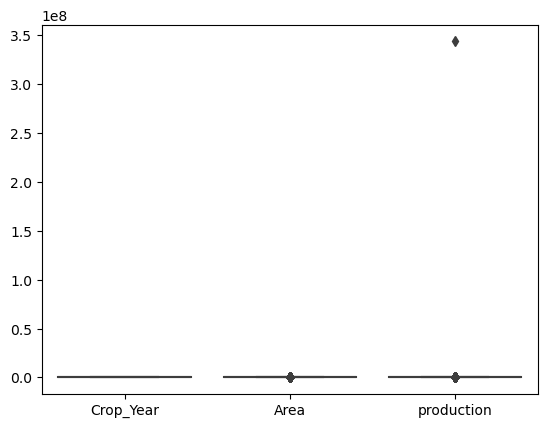

In [7]:
import seaborn as sns
sns.boxplot(data=data)

### 2.2 Treat Outliers

In [8]:
def outliers_treatment(df):
    for i in df.columns:
        if df[i].dtypes in ('int64','float64'):
            q1=df[i].quantile(0.25)
            q3=df[i].quantile(0.75)
            iqr=q3-q1
            upper_limit=q3+1.5*iqr
            lower_limit=q1-1.5*iqr
            df[i][df[i]<=lower_limit]=lower_limit
            df[i][df[i]>=upper_limit]=upper_limit
        else:
            df[i]=df[i]
    return(df)

###### Removing the outlier makes a stronger correlation. If the slope was positive, removing the outlier will increase the value of r , bringing it closer to 1.

In [9]:
outliers_treatment(data)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
0,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,197.875,161.248474
1,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.000,11.054167
2,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),197.875,161.248474
3,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,197.875,161.248474
4,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.000,3.633333
...,...,...,...,...,...,...,...
3725,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.000,1.359643
3726,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),197.875,161.248474
3727,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,197.875,161.248474
3728,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,197.875,161.248474


<AxesSubplot:>

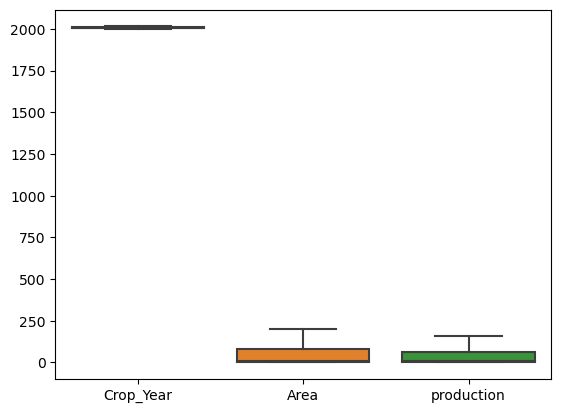

In [10]:
#Seaborn Library:Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.boxplot(data=data)

### 3. Numeric data

###### Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form.

In [11]:
import numpy as np
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head()

,Crop_Year,Area,production
0,2005,197.875,161.248474
1,2005,17.000,11.054167
2,2007,197.875,161.248474
3,2007,197.875,161.248474
4,2009,8.000,3.633333


### 4. Categorical Data

###### Categorical data refers to a data type that can be stored and identified based on the names or labels given to them.

In [12]:
data_cat = data[data.select_dtypes(include=['object']).columns.tolist()]
data_cat.head()

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Whole Year,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Whole Year,Dry chillies
2,Andhra Pradesh,ANANTAPUR,Kharif,Moong(Green Gram)
3,Andhra Pradesh,ANANTAPUR,Rabi,Horse-gram
4,Andhra Pradesh,ANANTAPUR,Rabi,Rapeseed &Mustard


### 5. Prepaing data for model training - Encoding

### sklearn.preprocessing.LabelEncoder

### 5.1 Convert Categorical to numeric values

###### Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier. LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder. 

###### Importance of data preprocessing: It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable. It makes data consistent.

###### The purpose of encoding is to transform data so that it can be properly (and safely) consumed by a different type of system, e.g. binary data being sent over email, or viewing special characters on a web page. The goal is not to keep information secret, but rather to ensure that it's able to be properly consumed.

In [13]:
from sklearn.preprocessing import LabelEncoder
data_cat=data_cat.apply(LabelEncoder().fit_transform)
data_cat.head(3)

,State_Name,District_Name,Season,Crop
0,0,269,4,0
1,0,269,4,15
2,1,16,1,30


### 5.2 Combine data

###### The Pandas concat() function is used to concatenate (or join together) two or more Pandas objects such as dataframes or series. It can be used to join two dataframes together vertically or horizontally, or add additional rows or columns.

In [14]:
data_combined = pd.concat([data_num, data_cat],axis=1)

In [15]:
data_combined.head()

,Crop_Year,Area,production,State_Name,District_Name,Season,Crop
0,2005,197.875,161.248474,0,269,4,0
1,2005,17.000,11.054167,0,269,4,15
2,2007,197.875,161.248474,1,16,1,30
3,2007,197.875,161.248474,1,16,2,21
4,2009,8.000,3.633333,1,16,2,41


### 6. Splitting Training and Test Data

###### We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, and the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.

###### Sklearn's model selection module provides various functions to cross-validate our model, tune the estimator's hyperparameters, or produce validation and learning curves. Here is a list of the functions provided in this module. Later we will understand the theory and use of these functions with code examples. The train_test_split function of the sklearn. model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.

###### The Sklearn train_test_split function helps us create our training data and test data. This is because typically, the training data and test data come from the same original dataset. To get the data to build a model, we start with a single dataset, and then we split it into two datasets: train and test. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model. After a model has been processed by using the training set, you test the model by making predictions against the test set.

In [16]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed


x = data_combined.drop(['production'],axis=1)
y = data_combined[['production']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=60)

### 7. Decision Tree Regressor Model

###### The decision tree model can be used for both classification and regression problems, and it is easy to interpret, understand, and visualize. The output of a decision tree can also be easily understood.Decision trees help you to evaluate your options. Decision trees are excellent tools for helping you to choose between several courses of action. They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options.

In [17]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
X_train = pd.DataFrame(X_train)
X_train.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop
66,2007,197.875,1,402,2,45
391,2011,1.000,6,304,1,32
3159,2002,7.000,22,378,1,1
519,2004,27.000,9,10,2,4
1916,2009,1.000,12,387,1,45


### 7.1 Predictions on train data

In [19]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production
66,2007,197.875,1,402,2,45,161.248474
391,2011,1.000,6,304,1,32,1.000000
3159,2002,7.000,22,378,1,1,5.683333
519,2004,27.000,9,10,2,4,8.720000
1916,2009,1.000,12,387,1,45,1.000000


###### The list() function allows us to create a list in Python. It takes an iterable as a parameter and returns a list. This iterable can be a tuple, a dictionary, a string, or even another list.

In [20]:
features = list(train.columns[1:])
features

['Area', 'State_Name', 'District_Name', 'Season', 'Crop', 'production']

###### Predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model. predict(X_new) ), and returns the learned label for each object in the array.

In [21]:
train['Predicted']=dt.predict(X_train)
train.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production,Predicted
66,2007,197.875,1,402,2,45,161.248474,161.248474
391,2011,1.000,6,304,1,32,1.000000,1.000000
3159,2002,7.000,22,378,1,1,5.683333,5.683333
519,2004,27.000,9,10,2,4,8.720000,8.720000
1916,2009,1.000,12,387,1,45,1.000000,1.000000


### 7.2 sklearn.metrics.r2_score

###### r2_score: (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a  score of 0.0. In the particular case when y_true is constant, the  score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). To prevent such non-finite numbers to pollute higher-level experiments such as a grid search cross-validation, by default these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect predictions) respectively. You can set force_finite to False to prevent this fix from happening.

In [22]:
from sklearn.metrics import r2_score
r = r2_score(train['Predicted'],train['production'])
print('Accuracy',r)

Accuracy 1.0


### 7.3 Predictions on test data

In [23]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production
987,2005,197.875,9,177,2,18,49.950000
3346,2011,5.000,23,322,1,55,2.875000
2044,2014,4.000,13,207,4,30,0.936738
866,2004,72.000,9,165,1,27,43.048333
1026,2010,14.000,9,177,1,30,1.100000


In [24]:
test['Predicted']=dt.predict(X_test)
test.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production,Predicted
987,2005,197.875,9,177,2,18,49.950000,161.248474
3346,2011,5.000,23,322,1,55,2.875000,2.001212
2044,2014,4.000,13,207,4,30,0.936738,0.000000
866,2004,72.000,9,165,1,27,43.048333,40.033333
1026,2010,14.000,9,177,1,30,1.100000,2.175000


In [25]:
r = r2_score(test['Predicted'],test['production'])
print('Test Accuracy',r)

Test Accuracy 0.733167930449842


### 8. Grid Search CV

###### GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

###### GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance. One method is to try out different values and then pick the value that gives the best score. This technique is known as a grid search. If we had to select the values for two or more parameters, we would evaluate all combinations of the sets of values thus forming a grid of values.

###### GridSearchCV is also known as GridSearch cross-validation: an internal cross-validation technique is used to calculate the score for each combination of parameters on the grid.

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [27]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=50, min_samples_split=100,
                      random_state=42)

In [28]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeRegressor(criterion='mse',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=100, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=50,
                      min_samples_split=100)

### 8.1 Predictions on train data

In [29]:
train['Predicted']=dt.predict(X_train)  #model=dt
train.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production,Predicted
66,2007,197.875,1,402,2,45,161.248474,132.057012
391,2011,1.000,6,304,1,32,1.000000,3.951403
3159,2002,7.000,22,378,1,1,5.683333,1.064575
519,2004,27.000,9,10,2,4,8.720000,20.192814
1916,2009,1.000,12,387,1,45,1.000000,1.064575


In [30]:
from sklearn.metrics import r2_score
r = r2_score(train['Predicted'],train['production'])
print('Train Accuracy',r)

Train Accuracy 0.5104488612357104


### 8.2 Predictions on test data

In [31]:
test['Predicted']=dt.predict(X_test)
test.head()

,Crop_Year,Area,State_Name,District_Name,Season,Crop,production,Predicted
987,2005,197.875,9,177,2,18,49.950000,140.792580
3346,2011,5.000,23,322,1,55,2.875000,1.064575
2044,2014,4.000,13,207,4,30,0.936738,11.970760
866,2004,72.000,9,165,1,27,43.048333,34.911964
1026,2010,14.000,9,177,1,30,1.100000,7.486405


In [32]:
from sklearn.metrics import r2_score
r = r2_score(test['Predicted'],test['production'])
print('Test Accuracy',r)

Test Accuracy 0.5300578204606046


###### In Decision Tree Regressor GridSearchCV Best Estimator Model We got the Train Accuracy: 0.5104488612357104 and Test Accuracy: 0.5300578204606046

### 8.3 Save the XGBoost Model For Deployment 

In [33]:
import os
os.chdir(r"D:\Shriraj\Master Thesis\New Code\New folder\Crop Yeild-20230318T151143Z-001\Crop Yeild")

In [34]:
import pickle
pickle.dump(dt, open('xgboost.pkl','wb'))

In [35]:
model = pickle.load(open('xgboost.pkl','rb'))

### 9. XG Boost Model

###### XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity.Xgboost is a gradient boosting library. It provides parallel boosting trees algorithm that can solve Machine Learning tasks.One of the key advantages of XGBoost is its ability to handle missing data and large datasets efficiently. It also has a number of hyperparameters that can be tuned to improve model performance, including the learning rate, depth of the trees, and regularization parameters.

### 9.1 Test_1

In [36]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[10, 50, 100, 200, 500],  # number of trees
        'max_depth': [3, 5, 10],                 # maximum number of branches in each tree 
        'min_samples_leaf': [10,5,15]            # minimum number of Sample in each child node or leaf 
                  }

In [37]:
from xgboost.sklearn import XGBRegressor

In [38]:
model = XGBRegressor(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='neg_mean_squared_error')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[16:53:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...ors=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=0, scale_pos_weight=None,
               

In [39]:
# Re-fit the model with the best parameters
final_mod = XGBRegressor(**gscv.best_params_)
final_mod.fit(X_train, y_train)

[16:53:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1,
             min_samples_leaf=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### 9.1.1 Predictions on train data

In [40]:
#Prediction
train_pred = final_mod.predict(X_train)
test_pred = final_mod.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r = r2_score(y_train,train_pred)
print('Train Accuracy',r)

Train Accuracy 0.9763499710545065


### 9.1.2 Predictions on test data

In [42]:
from sklearn.metrics import r2_score
r = r2_score(y_test,test_pred)
print('Test Accuracy',r)

Test Accuracy 0.8421030173386151


###### In Test_1 of XGBoost Model We got the Train Accuracy: 0.9763499710545065 and Test Accuracy: 0.8421030173386151

### 9.2 Test_2

In [43]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[40, 60, 230, 60, 180],  # number of trees
        'max_depth': [2,4,15],                 # maximum number of branches in each tree 
        'min_samples_leaf': [3,20,9]            # minimum number of Sample in each child node or leaf 
                  }

In [44]:
from xgboost.sklearn import XGBRegressor

In [45]:
model = XGBRegressor(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='neg_mean_squared_error')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[16:53:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...ators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=0, scale_pos_weight=None,
             

In [46]:
# Re-fit the model with the best parameters
final_mod2 = XGBRegressor(**gscv.best_params_)
final_mod2.fit(X_train, y_train)

[16:53:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1,
             min_samples_leaf=3, missing=nan, monotone_constraints='()',
             n_estimators=230, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### 9.2.1 Predictions on train and test data

In [47]:
#Prediction
train_pred = final_mod2.predict(X_train)
test_pred = final_mod2.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r = r2_score(y_train,train_pred)
print('Train Accuracy',r)

Train Accuracy 0.9752323334437393


In [49]:
from sklearn.metrics import r2_score
r = r2_score(y_test,test_pred)
print('Test Accuracy',r)

Test Accuracy 0.857089543559731


###### In Test_2 of XGBoost Model We got the Train Accuracy: 0.9752323334437393 and Test Accuracy: 0.857089543559731

### 9.3 Test_3

In [50]:
# Define Model parameters to tune
model_parameters = { 
        'n_estimators':[40, 80, 150, 200, 250],  # number of trees
        'max_depth': [10,25,30],                 # maximum number of branches in each tree 
        'min_samples_leaf': [5,15,25]            # minimum number of Sample in each child node or leaf 
                  }

In [51]:
model = XGBRegressor(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='neg_mean_squared_error')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[16:54:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...s=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=0, scale_pos_weight=None,
                 

In [52]:
# Re-fit the model with the best parameters
final_mod3 = XGBRegressor(**gscv.best_params_)
final_mod3.fit(X_train, y_train)

[16:54:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1,
             min_samples_leaf=5, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=4, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### 9.3.1 Predictions on train and test data

In [53]:
#Prediction
train_pred = final_mod3.predict(X_train)
test_pred = final_mod3.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
r = r2_score(y_train,train_pred)
print('Train Accuracy',r)

Train Accuracy 0.9996372290423005


In [55]:
from sklearn.metrics import r2_score
r = r2_score(y_test,test_pred)
print('Test Accuracy',r)

Test Accuracy 0.8305143658922132


###### In Test_3 of XGBoost Model We got the Train Accuracy 0.9996372290423005 and Test Accuracy 0.8305143658922132.

### 10. Save the model

In [56]:
import os
os.chdir(r"D:\Shriraj\Master Thesis\New Code\New folder\Crop Yeild-20230318T151143Z-001\Crop Yeild")

In [57]:
import pickle
pickle.dump(final_mod2, open('xgboost.pkl','wb'))

In [58]:
model = pickle.load(open('xgboost.pkl','rb'))

### 11. Comparison of  The Three Train and Test of XGBoost Model

### 11.1 Outputs

In [59]:
import pandas as pd

data={'Train':[97,98,99],'Test':[84,85,83]}

df=pd.DataFrame(data)

df #print the dataframe

,Train,Test
0,97,84
1,98,85
2,99,83


###### As per above 3 tests We got the highest accuracy in Test_2 and Test_3 but in between Test_2 and Test_3 highest accuracy will be Test_3 of XGBoost Model which is Train Accuracy: 99% and Test Accuracy: 85%.


### 11.2 Outputs in graphical format

Text(0, 0.5, 'Accuracy')

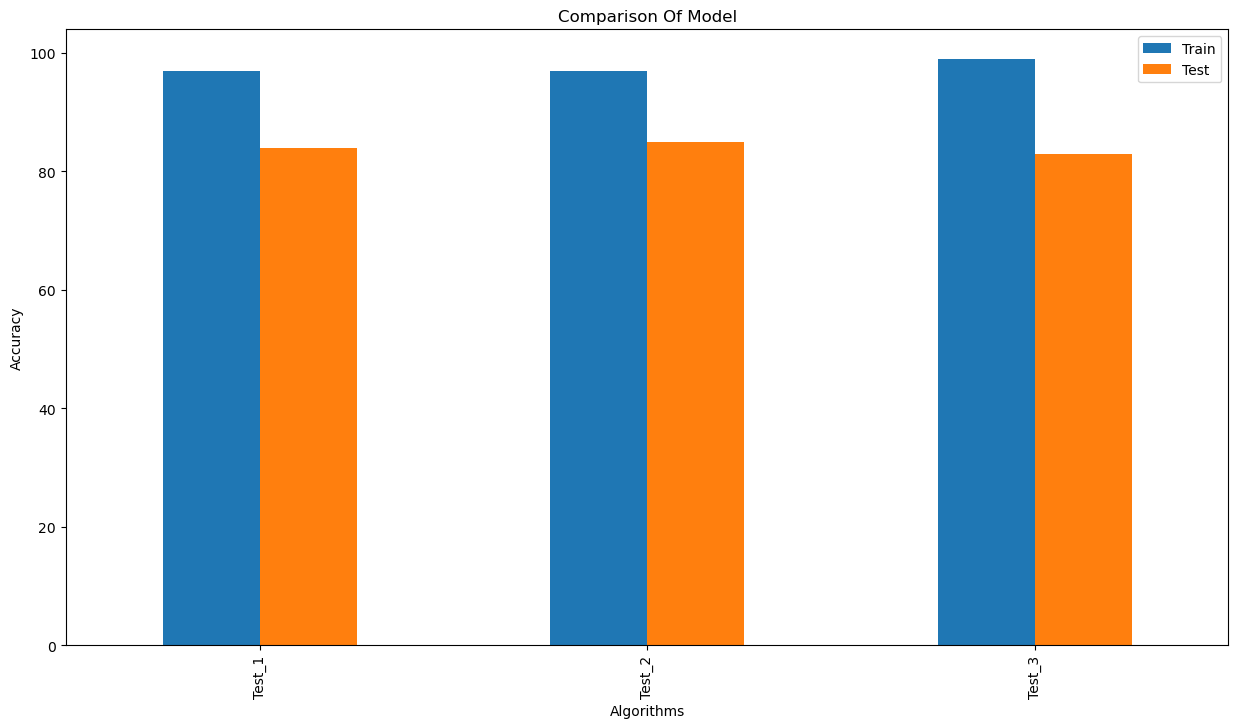

In [60]:
plotdata = pd.DataFrame({'Train':[97,97,99],
                         'Test' : [84,85,83]
                         },
    index=['Test_1','Test_2','Test_3'])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison Of Model")

plt.xlabel("Algorithms") 
plt.ylabel("Accuracy") 

#### From above graph it is clearly seen that we are getting the best accuracy on test data of 85%, SO we will move further with test-2

### 12. Comparison Of Decision Tree and XGBoost Models

### 12.1 Outputs[Deployment]

In [61]:
import pandas as pd

data={'Decision Tree':[110,70,134,68,146],'XGBoost':[130,116,164,76,140]}

df=pd.DataFrame(data)

df #print the dataframe

,Decision Tree,XGBoost
0,110,130
1,70,116
2,134,164
3,68,76
4,146,140


###### In this project I have made GUI for both model. The XGBoost Model and Decision Tree Model deployment results means crop yield prediction shown in below dataframe as well as in graphs. Those values has taken from both model deploments outputs for comparison. In this Deployment results of XGBoost Model is high and Decision Tree Model is less. 

### 12.2 Outputs in Graphical format

Text(0, 0.5, 'Accuracy')

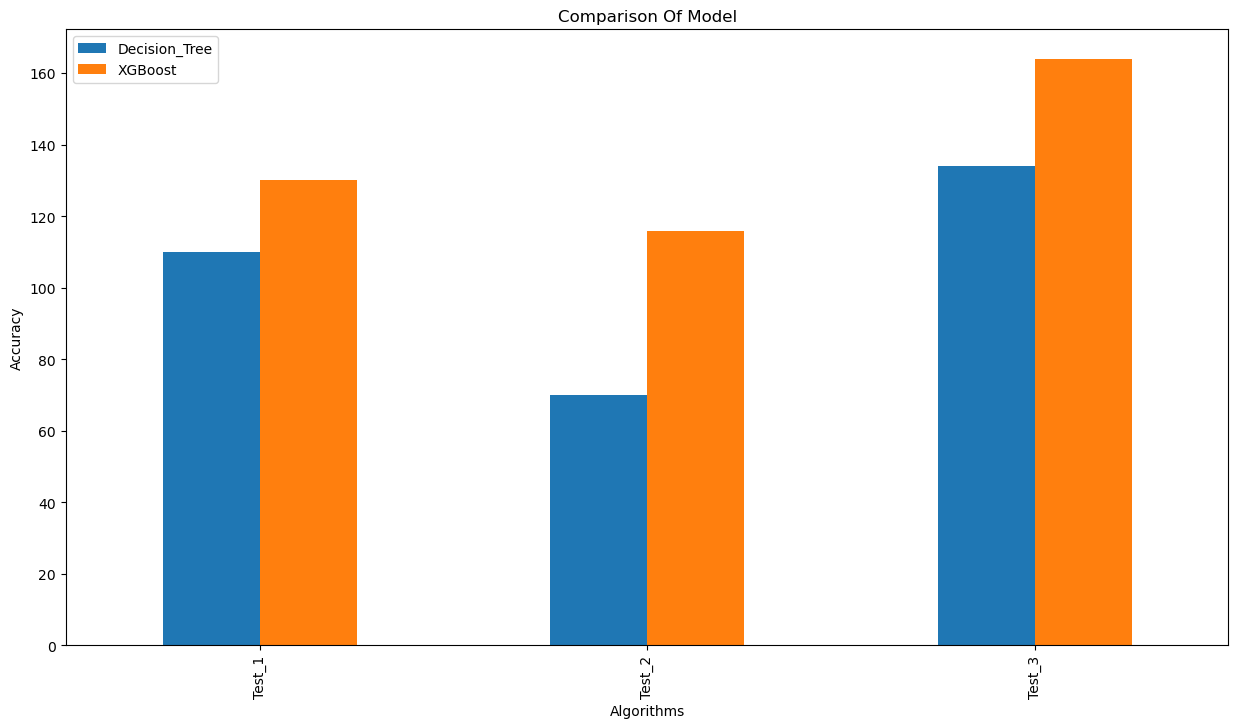

In [62]:
plotdata = pd.DataFrame({'Decision_Tree':[110,70,134,],
                         'XGBoost' : [130,116,164,]
                         },
    index=['Test_1','Test_2','Test_3'])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison Of Model")

plt.xlabel("Algorithms") 
plt.ylabel("Accuracy")

###### In this Every Test Deployment results of XGBoost Model is high and Decision Tree Model is less.

Text(0, 0.5, 'Accuracy')

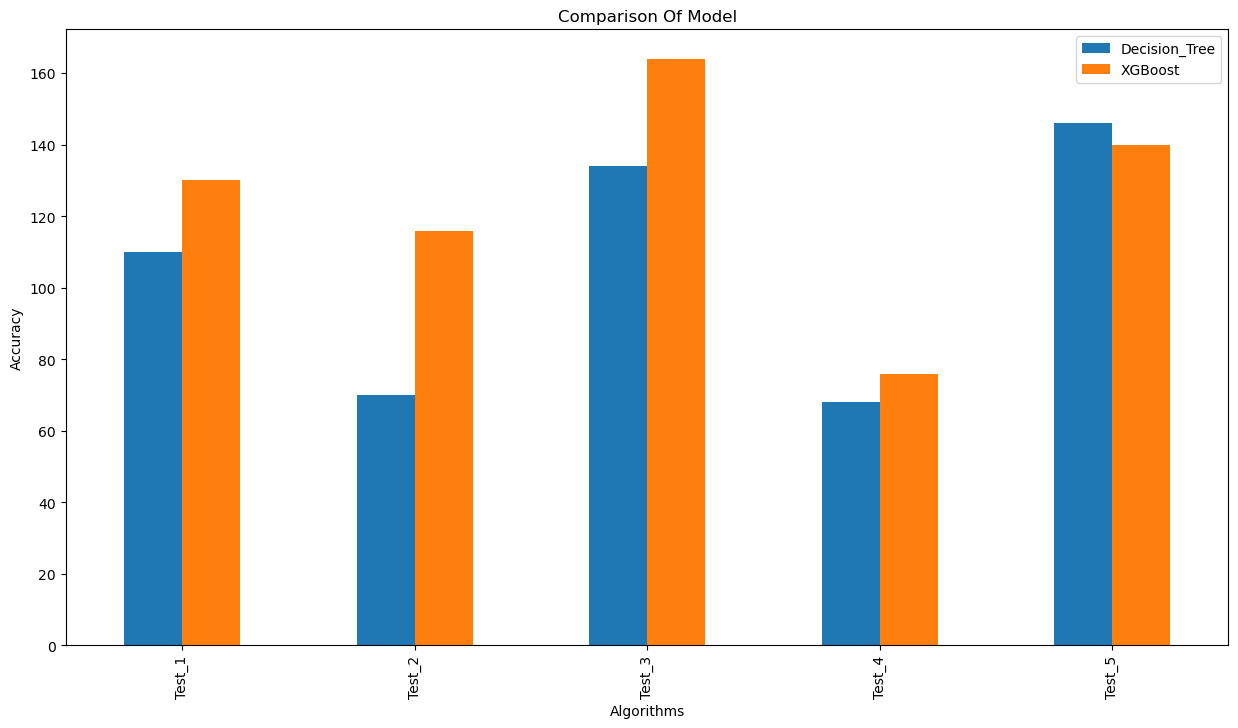

In [63]:
plotdata = pd.DataFrame({'Decision_Tree':[110,70,134,68,146],
                         'XGBoost' : [130,116,164,76,140]
                         },
    index=['Test_1','Test_2','Test_3','Test_4','Test_5'])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Comparison Of Model")

plt.xlabel("Algorithms") 
plt.ylabel("Accuracy")

#### From the above graph we can conclude that rather than decision tree model, XGBoost model gives us the best accuracy.

### 13. Calculating Approximate Latency for Model

###### Latency is a measurement in Machine Learning to determine the performance of various models for a specific application. Latency refers to the time taken to process one unit of data provided only one unit of data is processed at a time.

###### Time Library: The Python time module provides many ways of representing time in code, such as objects, numbers, and strings. It also provides functionality other than representing time, like waiting during code execution and measuring the efficiency of your code

In [64]:
import time

In [65]:
# Length of test data
l = len(X_test)
l

1119

In [66]:
# Measuring response time of model 
pred_time_list=[]
for i in range(10): 
    start = time.time() 
    result = final_mod3.predict(X_test)
    end = time.time()
    pred_time_list.append(end-start)
print(pred_time_list)

[0.007998228073120117, 0.0, 0.008004188537597656, 0.0, 0.008007287979125977, 0.008003950119018555, 0.0, 0.00800633430480957, 0.0, 0.00800466537475586]


###### I measured the response time of our model 10 times for better results. I will now took the average of all the 10 response times and will divide it by length of test data in order to get response time for a particular input.

In [67]:
# Measuring response time of model for a particular input
latency = pd.Series(pred_time_list).mean()/l

In [68]:
latency

4.29174748779515e-06

###### The response time of our model for a particular input of dataset came out to be 4.29174748779515e-06 seconds (s).